In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from tqdm import tqdm
import os
import pickle

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

# pickle savedata
def save_data(df, filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "wb" ) as file:
        pickle.dump(df, file)

# pickle load data
def load_data(filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "rb" ) as file:
        return pickle.load(file)
    
def save(data):
    save_data(data, 'tmp')

def load():
    return load_data('tmp')

def check_shape(all_data):
    a = load()
    assert a.shape[0] == all_data.shape[0]

## Load Files

In [43]:
train = pd.read_csv('data/application_train.csv')
test = pd.read_csv('data/application_test.csv')

In [44]:
train.shape, test.shape

((307511, 122), (48744, 121))

In [46]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

## Concat Data

In [6]:
all_data = pd.concat([train, test], sort=False)

## Data Structure

In [7]:
from IPython.display import Image

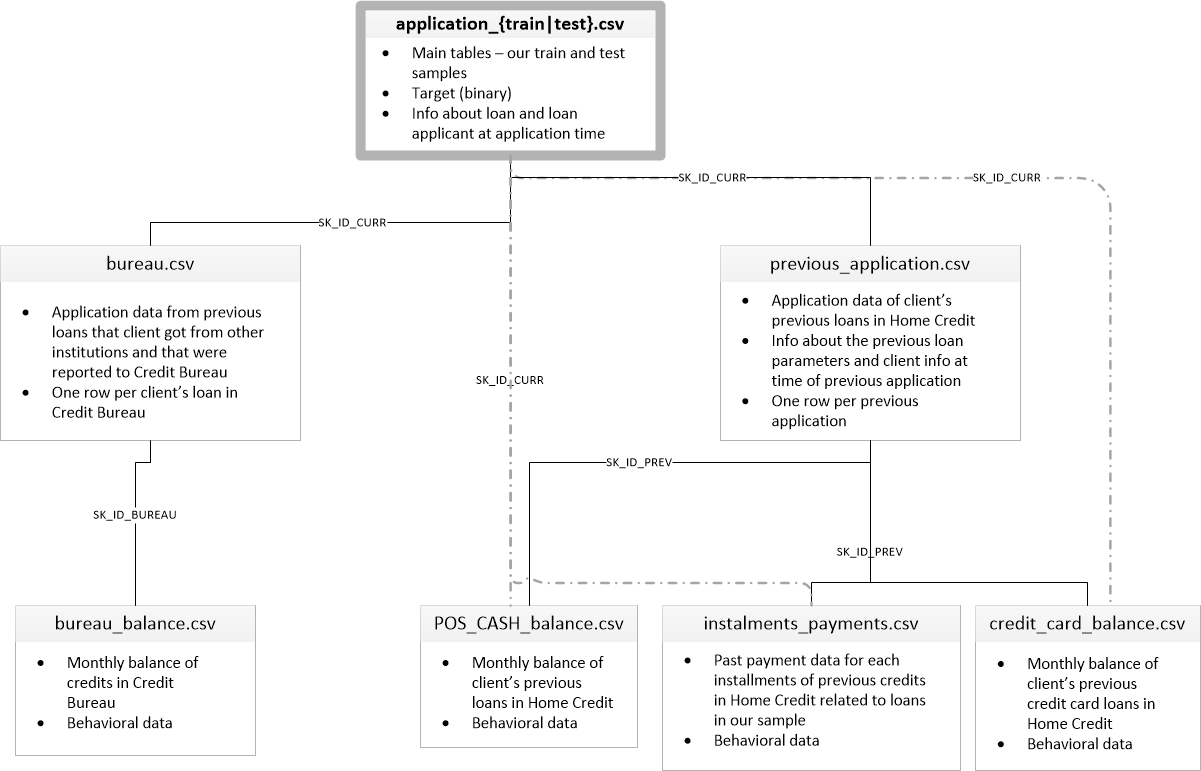

In [8]:
Image('data/home_credit.png')

## Merge Data

### Bureau

In [9]:
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


**bureau의 nunique merge**

In [10]:
right = bureau.groupby('SK_ID_CURR')[bureau.select_dtypes(include='object').columns].agg('nunique').reset_index()

In [11]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [12]:
check_shape(all_data)

**bureau의 numeric column 에 대한 stat 적용**

In [13]:
right = bureau[bureau.select_dtypes(exclude='object').columns] \
            .groupby('SK_ID_CURR') \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median']).reset_index()

In [14]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [15]:
check_shape(all_data)

### Bureau_balance

In [16]:
bureau_balance = pd.read_csv('data/bureau_balance.csv')
print(bureau_balance.shape)
bureau_balance.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [17]:
right = bureau_balance.groupby('SK_ID_BUREAU')['STATUS'].agg(['nunique', 'size']).reset_index()
right.head()

,SK_ID_BUREAU,nunique,size
0,5001709,2,97
1,5001710,3,83
2,5001711,2,4
3,5001712,2,19
4,5001713,1,22


In [18]:
bureau = pd.merge(bureau, right, how='left', on='SK_ID_BUREAU')

In [19]:
right = bureau_balance.groupby('SK_ID_BUREAU')['MONTHS_BALANCE'] \
            .agg(['sum', 'count', 'mean', 'std', 'min', 'max', 'median'])

In [20]:
bureau = pd.merge(bureau, right, how='left', on='SK_ID_BUREAU')

In [21]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,nunique,size,sum,count,mean,std,min,max,median
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### merge bureau to all_data

In [22]:
right = bureau.groupby('SK_ID_CURR')[bureau.select_dtypes(include='object').columns].agg(['size', 'nunique']).reset_index()
print(right.shape)
right.head()

(305811, 7)


SK_ID_CURR CREDIT_ACTIVE         CREDIT_CURRENCY         CREDIT_TYPE        
                      size nunique            size nunique        size nunique
0     100001             7       2               7       1           7       1
1     100002             8       2               8       1           8       2
2     100003             4       2               4       1           4       2
3     100004             2       1               2       1           2       1
4     100005             3       2               3       1           3       2

In [23]:
right.columns

MultiIndex([(     'SK_ID_CURR',        ''),
            (  'CREDIT_ACTIVE',    'size'),
            (  'CREDIT_ACTIVE', 'nunique'),
            ('CREDIT_CURRENCY',    'size'),
            ('CREDIT_CURRENCY', 'nunique'),
            (    'CREDIT_TYPE',    'size'),
            (    'CREDIT_TYPE', 'nunique')],
           )

In [24]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

,SK_ID_CURR,CREDIT_ACTIVE_size,CREDIT_ACTIVE_nunique,CREDIT_CURRENCY_size,CREDIT_CURRENCY_nunique,CREDIT_TYPE_size,CREDIT_TYPE_nunique
0,100001,7,2,7,1,7,1
1,100002,8,2,8,1,8,2
2,100003,4,2,4,1,4,2
3,100004,2,1,2,1,2,1
4,100005,3,2,3,1,3,2
...,...,...,...,...,...,...,...
305806,456249,13,2,13,1,13,3
305807,456250,3,2,3,1,3,2
305808,456253,4,2,4,1,4,2
305809,456254,1,1,1,1,1,1


In [25]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [26]:
all_data.shape

(356255, 222)

In [27]:
pd.options.display.max_columns = 9999

In [28]:
all_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE,"(SK_ID_BUREAU, sum)","(SK_ID_BUREAU, count)","(SK_ID_BUREAU, mean)","(SK_ID_BUREAU, std)","(SK_ID_BUREAU, min)","(SK_ID_BUREAU, max)","(SK_ID_BUREAU, median)","(DAYS_CREDIT, sum)","(DAYS_CREDIT, count)","(DAYS_CREDIT, mean)","(DAYS_CREDIT, std)","(DAYS_CREDIT, min)","(DAYS_CREDIT, max)","(DAYS_CREDIT, median)","(CREDIT_DAY_OVERDUE, sum)","(CREDIT_DAY_OVERDUE, count)","(CREDIT_DAY_OVERDUE, mean)","(CREDIT_DAY_OVERDUE, std)","(CREDIT_DAY_OVERDUE, min)","(CREDIT_DAY_OVERDUE, max)","(CREDIT_DAY_OVERDUE, median)","(DAYS_CREDIT_ENDDATE, sum)","(DAYS_CREDIT_ENDDATE, count)","(DAYS_CREDIT_ENDDATE, mean)","(DAYS_CREDIT_ENDDATE, std)","(DAYS_CREDIT_ENDDATE, min)","(DAYS_CREDIT_ENDDATE, max)","(DAYS_CREDIT_ENDDATE, median)","(DAYS_ENDDATE_FACT, sum)","(DAYS_ENDDATE_FACT, count)","(DAYS_ENDDATE_FACT, mean)","(DAYS_ENDDATE_FACT, std)","(DAYS_ENDDATE_FACT, min)","(DAYS_ENDDATE_FACT, max)","(DAYS_ENDDATE_FACT, median)","(AMT_CREDIT_MAX_OVERDUE, sum)","(AMT_CREDIT_MAX_OVERDUE, count)","(AMT_CREDIT_MAX_OVERDUE, mean)","(AMT_CREDIT_MAX_OVERDUE, std)","(AMT_CREDIT_MAX_OVERDUE, min)","(AMT_CREDIT_MAX_OVERDUE, max)","(AMT_CREDIT_MAX_OVERDUE, median)","(CNT_CREDIT_PROLONG, sum)","(CNT_CREDIT_PROLONG, count)","(CNT_CREDIT_PROLONG, mean)","(CNT_CREDIT_PROLONG, std)","(CNT_CREDIT_PROLONG, min)","(CNT_CREDIT_PROLONG, max)","(CNT_CREDIT_PROLONG, median)","(AMT_CREDIT_SUM, sum)","(AMT_CREDIT_SUM, count)","(AMT_CREDIT_SUM, mean)","(AMT_CREDIT_SUM, std)","(AMT_CREDIT_SUM, min)","(AMT_CREDIT_SUM, max)","(AMT_CREDIT_SUM, median)","(AMT_CREDIT_SUM_DEBT, sum)","(AMT_CREDIT_SUM_DEBT, count)","(AMT_CREDIT_SUM_DEBT, mean)","(AMT_CREDIT_SUM_DEBT, std)","(AMT_CREDIT_SUM_DEBT, min)","(AMT_CREDIT_SUM_DEBT, max)","(AMT_CREDIT_SUM_DEBT, median)","(AMT_CREDIT_SUM_LIMIT

In [29]:
### sample
all_data = all_data.merge(all_data.groupby(["NAME_TYPE_SUITE"])["AMT_INCOME_TOTAL"].agg(["mean","std","min","max"]).reset_index().rename({"mean":"AMT_INCOME_TOTAL_mean"},axis = 1), on = "NAME_TYPE_SUITE", how = "left")
# test = test.merge(test.groupby(["NAME_TYPE_SUITE"])["AMT_INCOME_TOTAL"].agg(["mean","std","min","max"]).reset_index().rename({"mean":"AMT_INCOME_TOTAL_mean"},axis = 1), on = "NAME_TYPE_SUITE", how = "left")
all_data["AMT_INCOME_TOTAL_mean_mean"]=all_data["AMT_INCOME_TOTAL"] - all_data["AMT_INCOME_TOTAL_mean"]
# test["AMT_INCOME_TOTAL_mean_mean"]=test["AMT_INCOME_TOTAL"] - test["AMT_INCOME_TOTAL_mean"]

all_data = all_data.merge(all_data.groupby(["NAME_TYPE_SUITE"])["AMT_ANNUITY"].agg(["mean","std","min","max"]).reset_index().rename({"mean":"AMT_ANNUITY_mean"},axis = 1), on = "NAME_TYPE_SUITE", how = "left")
# test = test.merge(test.groupby(["NAME_TYPE_SUITE"])["AMT_ANNUITY"].agg(["mean","std","min","max"]).reset_index().rename({"mean":"AMT_ANNUITY_mean"},axis = 1), on = "NAME_TYPE_SUITE", how = "left")
all_data["AMT_ANNUITY_mean_mean"]=all_data["AMT_ANNUITY"] - all_data["AMT_ANNUITY_mean"]
# test["AMT_ANNUITY_mean_mean"]=test["AMT_ANNUITY"] - test["AMT_ANNUITY_mean"]

In [30]:
# all_data.groupby('NAME_INCOME_TYPE')['AMT_GOODS_PRICE'].mean()

In [31]:
right = bureau.groupby('SK_ID_CURR') \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()
right

SK_ID_CURR SK_ID_BUREAU                                                \
                           sum         mean            std      min      max   
0          100001     41276431  5896633.000       2.160247  5896630  5896636   
1          100002     49226177  6153272.125   15935.004993  6113835  6158909   
2          100003     23543514  5885878.500       1.290994  5885877  5885880   
3          100004     13658267  6829133.500       0.707107  6829133  6829134   
4          100005     20205603  6735201.000       1.000000  6735200  6735202   
...           ...          ...          ...            ...      ...      ...   
305806     456249     69832100  5371700.000       3.894440  5371694  5371706   
305807     456250     20451711  6817237.000       1.000000  6817236  6817238   
305808     456253     23540074  5885018.500  518375.097332  5113039  6230038   
305809     456254      6669849  6669849.000            NaN  6669849  6669849   
305810     456255     56389652  5126332.000       3.316625  5126327  5126337   

                  DAYS_CREDIT                                               \
           median         sum         mean         std   min   max  median   
0       5896633.0       -5145  -735.000000  489.942514 -1572   -49  -857.0   
1       6158905.5       -6992  -874.000000  431.451040 -1437  -103 -1042.5   
2       5885878.5       -5603 -1400.750000  909.826128 -2586  -606 -1205.5   
3       6829133.5       -1734  -867.000000  649.124025 -1326  -408  -867.0   
4       6735201.0        -572  -190.666667  162.297053  -373   -62  -137.0   
...           ...         ...          ...         ...   ...   ...     ...   
305806  5371700.0      -21672 -1667.076923  638.202353 -2713  -483 -1680.0   
305807  6817237.0       -2586  -862.000000  125.395375 -1002  -760  -824.0   
305808  6098498.5       -3470  -867.500000  103.000000  -919  -713  -919.0   
305809  6669849.0       -1104 -1104.000000         NaN -1104 -1104 -1104.0   
305810  5126332.0      -11984 -1089.454545  709.074518 -2337  -363 -1020.0   

       CREDIT_DAY_OVERDUE                          DAYS_CREDIT_ENDDATE  \
                      sum mean  std min max median                 sum   
0                       0  0.0  0.0   0   0    0.0               577.0   
1                       0  0.0  0.0   0   0    0.0             -2094.0   
2                       0  0.0  0.0   0   0    0.0             -2178.0   
3                       0  0.0  0.0   0   0    0.0              -977.0   
4                       0  0.0  0.0   0   0    0.0              1318.0   
...                   ...  ...  ...  ..  ..    ...                 ...   
305806                  0  0.0  0.0   0   0    0.0            -14788.0   
305807                  0  0.0  0.0   0   0    0.0              3865.0   
305808                  0  0.0  0.0   0   0    0.0              1122.0   
305809                  0  0.0  NaN   0   0    0.0              -859.0   
305810                  0  0.0  0.0   0   0    0.0             35544.0   

                                                          DAYS_ENDDATE_FACT  \
               mean          std     min      max  median               sum   
0         82.428571  1032.859277 -1329.0   1778.0  -179.0           -3302.0   
1       -349.000000   767.490977 -1072.0    780.0  -424.5           -4185.0   
2       -544.500000  1492.770467 -2434.0   1216.0  -480.0           -3292.0   
3       -488.500000   150.613744  -595.0   -382.0  -488.5           -1065.0   
4        439.333333   776.274007  -128.0   1324.0   122.0            -123.0   
...             ...          ...     ...      ...     ...               ...   
305806 -1232.333333   977.587321 -2499.0   1363.0 -1339.0          -16377.0   
305807  1288.333333  1378.293268  -272.0   2340.0  1797.0            -760.0   
305808   280.500000   617.861635  -189.0   1113.0    99.0           -1588.0   
305809  -859.000000          NaN  -859.0   -859.0  -859.0            -859.0   
305810  3231.272727  8443.015422 -1243.0

In [32]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

,SK_ID_CURR,SK_ID_BUREAU_sum,SK_ID_BUREAU_mean,SK_ID_BUREAU_std,SK_ID_BUREAU_min,SK_ID_BUREAU_max,SK_ID_BUREAU_median,DAYS_CREDIT_sum,DAYS_CREDIT_mean,DAYS_CREDIT_std,DAYS_CREDIT_min,DAYS_CREDIT_max,DAYS_CREDIT_median,CREDIT_DAY_OVERDUE_sum,CREDIT_DAY_OVERDUE_mean,CREDIT_DAY_OVERDUE_std,CREDIT_DAY_OVERDUE_min,CREDIT_DAY_OVERDUE_max,CREDIT_DAY_OVERDUE_median,DAYS_CREDIT_ENDDATE_sum,DAYS_CREDIT_ENDDATE_mean,DAYS_CREDIT_ENDDATE_std,DAYS_CREDIT_ENDDATE_min,DAYS_CREDIT_ENDDATE_max,DAYS_CREDIT_ENDDATE_median,DAYS_ENDDATE_FACT_sum,DAYS_ENDDATE_FACT_mean,DAYS_ENDDATE_FACT_std,DAYS_ENDDATE_FACT_min,DAYS_ENDDATE_FACT_max,DAYS_ENDDATE_FACT_median,AMT_CREDIT_MAX_OVERDUE_sum,AMT_CREDIT_MAX_OVERDUE_mean,AMT_CREDIT_MAX_OVERDUE_std,AMT_CREDIT_MAX_OVERDUE_min,AMT_CREDIT_MAX_OVERDUE_max,AMT_CREDIT_MAX_OVERDUE_median,CNT_CREDIT_PROLONG_sum,CNT_CREDIT_PROLONG_mean,CNT_CREDIT_PROLONG_std,CNT_CREDIT_PROLONG_min,CNT_CREDIT_PROLONG_max,CNT_CREDIT_PROLONG_median,AMT_CREDIT_SUM_sum,AMT_CREDIT_SUM_mean,AMT_CREDIT_SUM_std,AMT_CREDIT_SUM_min,AMT_CREDIT_SUM_max,AMT_CREDIT_SUM_median,AMT_CREDIT_SUM_DEBT_sum,AMT_CREDIT_SUM_DEBT_mean,AMT_CREDIT_SUM_DEBT_std,AMT_CREDIT_SUM_DEBT_min,AMT_CREDIT_SUM_DEBT_max,AMT_CREDIT_SUM_DEBT_median,AMT_CREDIT_SUM_LIMIT_sum,AMT_CREDIT_SUM_LIMIT_mean,AMT_CREDIT_SUM_LIMIT_std,AMT_CREDIT_SUM_LIMIT_min,AMT_CREDIT_SUM_LIMIT_max,AMT_CREDIT_SUM_LIMIT_median,AMT_CREDIT_SUM_OVERDUE_sum,AMT_CREDIT_SUM_OVERDUE_mean,AMT_CREDIT_SUM_OVERDUE_std,AMT_CREDIT_SUM_OVERDUE_min,AMT_CREDIT_SUM_OVERDUE_max,AMT_CREDIT_SUM_OVERDUE_median,DAYS_CREDIT_UPDATE_sum,DAYS_CREDIT_UPDATE_mean,DAYS_CREDIT_UPDATE_std,DAYS_CREDIT_UPDATE_min,DAYS_CREDIT_UPDATE_max,DAYS_CREDIT_UPDATE_median,AMT_ANNUITY_sum,AMT_ANNUITY_mean,AMT_ANNUITY_std,AMT_ANNUITY_min,AMT_ANNUITY_max,AMT_ANNUITY_median,nunique_sum,nunique_mean,nunique_std,nunique_min,nunique_max,nunique_median,size_sum,size_mean,size_std,size_min,size_max,size_median,sum_sum,sum_mean,sum_std,sum_min,sum_max,sum_median,count_sum,count_mean,count_std,count_min,count_max,count_median,mean_sum,mean_mean,mean_std,mean_min,mean_max,mean_median,std_sum,std_mean,std_std,std_min,std_max,std_median,min_sum,min_mean,min_std,min_min,min_max,min_median,max_sum,max_mean,max_std,max_min,max_max,max_median,median_sum,median_mean,median_std,median_min,median_max,median_median
0,100001,41276431,5896633.000,2.160247,5896630,5896636,5896633.0,-5145,-735.000000,489.942514,-1572,-49,-857.0,0,0.0,0.0,0,0,0.0,577.0,82.428571,1032.859277,-1329.0,1778.0,-179.0,-3302.0,-825.500000,369.078582,-1328.0,-544.0,-715.0,0.000,NaN,NaN,NaN,NaN,NaN,0,0.000000,0.000000,0,0,0.0,1453365.000,2.076236e+05,122544.544510,85500.0,378000.00,168345.00,596686.500,85240.928571,137485.631124,0.0,373239.00,0.000,0.000,0.00000,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-652,-93.142857,77.204120,-155,-6,-155.0,24817.500,3545.357143,4800.607529,0.000,10822.5,0.0,17.0,2.428571,0.786796,1.0,3.0,3.0,172.0,24.571429,16.050515,2.0,52.0,29.0,-2800.0,-400.000000,445.241507,-1326.0,-1.0,-406.0,172.0,24.571429,16.050515,2.0,52.0,29.0,-82.5,-11.785714,8.025258,-25.5,-0.5,-14.0,50.638598,7.234085,4.636978,0.707107,15.154757,8.514693,-165.0,-23.571429,16.050515,-51.0,-1.0,-28.0,0.0,0.000000,0.000000,0.0,0.0,0.0,-82.5,-11.785714,8.025258,-25.5,-0.5,-14.0
1,100002,49226177,6153272.125,15935.004993,6113835,6158909,6158905.5,-6992,-874.000000,431.451040,-1437,-103,-1042.5,0,0.0,0.0,0,0,0.0,-2094.0,-349.000000,767.490977,-1072.0,780.0,-424.5,-4185.0,-697.500000,515.992539,-1185.0,-36.0,-939.0,8405.145,1681.029,2363.246900,0.0,5043.645,40.500,0,0.000000,0.000000,0,0,0.0,865055.565,1.081319e+05,146075.557435,0.0,450000.00,54130.50,245781.000,49156.200000,109916.604716,0.0,245781.00,0.000,31988.565,7997.14125,15994.282500,0.0,31988.565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3999,-499.875000,518.522472,-1185,-7,-402.5,0.000,0.000000,0.000000,0.000,0.0,0.0,26.0,3.250000,1.035098,2.0,4.0,4.0,110.0,13.750000,6.363961,4.0,22.0,16.0,-2701.0,-337.625000,236.107686,-632.0,-6.0,-424.0,110.0,13.750000

In [33]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [34]:
all_data.shape

(356255, 364)

In [35]:
save(all_data)

In [36]:
all_data = load()

### pos_cash_balance

In [37]:
pos_cash_balance = pd.read_csv('data/POS_CASH_balance.csv')
print(pos_cash_balance.shape)
pos_cash_balance.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [40]:
right = pos_cash_balance.drop('SK_ID_PREV', 1).groupby(['SK_ID_CURR']) \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()

In [41]:
right = right.drop('SK_ID_PREV', 1)

KeyError: 'SK_ID_PREV'

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

In [ ]:
right = pos_cash_balance.groupby(['SK_ID_CURR'])['NAME_CONTRACT_STATUS'] \
            .agg(['nunique', 'size'])
right.head()

In [ ]:
right = right.reset_index()

right칼럼 이름 바꾸기

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

In [ ]:
save(all_data)

In [ ]:
all_data = load()

### previous_application

In [ ]:
prev = pd.read_csv('data/previous_application.csv')

In [ ]:
print(prev.shape)
prev.head()

apply nunique to categorical column

In [ ]:
right = prev.groupby('SK_ID_CURR')[prev.select_dtypes(include='object').columns].agg(['nunique', 'size'])
right = right.reset_index()
right.head()

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

In [ ]:
# right = prev.groupby('SK_ID_CURR')[prev.select_dtypes(include='object').columns].agg(['nunique', 'size'])
# right = right.reset_index()
# right.head()

In [ ]:
right = prev.drop('SK_ID_PREV', 1).groupby(['SK_ID_CURR']) \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

apply stats to numerical column

### credit_card_balance

In [ ]:
credit_card_balance = pd.read_csv('data/credit_card_balance.csv')
print(credit_card_balance.shape)
credit_card_balance.head()

In [ ]:
right = credit_card_balance.drop('SK_ID_PREV', 1).groupby('SK_ID_CURR')[credit_card_balance.select_dtypes(include='object').columns].agg(['nunique', 'size'])
right = right.reset_index()
right.head()

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
right = credit_card_balance.drop('SK_ID_PREV', 1).groupby(['SK_ID_CURR']) \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

### installments_payments

In [ ]:
installments_payments = pd.read_csv('data/installments_payments.csv')

In [ ]:
print(installments_payments.shape)
installments_payments.head()

In [ ]:
right = installments_payments.drop('SK_ID_PREV', 1).groupby(['SK_ID_CURR']) \
            .agg(['sum', 'mean', 'std', 'min', 'max', 'median']).reset_index()

In [ ]:
right.columns = ['_'.join(col) for col in right.columns]
right = right.rename({'SK_ID_CURR_':'SK_ID_CURR'}, axis=1)
right

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
all_data.shape

## 교호 작용

In [ ]:
all_data['NEW_SOURCES_PROD'] = all_data['EXT_SOURCE_1'] * all_data['EXT_SOURCE_2'] * all_data['EXT_SOURCE_3']
all_data['NEW_EXT_SOURCES_MEAN'] = all_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
all_data['NEW_SCORES_STD'] = all_data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [ ]:
save(all_data)

## 튜터님 코드

In [ ]:
all_data = load()

In [ ]:
all_data['DAYS_EMPLOYED_PERC'] = all_data['DAYS_EMPLOYED'] / all_data['DAYS_BIRTH']
all_data['INCOME_CREDIT_PERC'] = all_data['AMT_INCOME_TOTAL'] / all_data['AMT_CREDIT']
all_data['INCOME_PER_PERSON'] = all_data['AMT_INCOME_TOTAL'] / all_data['CNT_FAM_MEMBERS']
all_data['ANNUITY_INCOME_PERC'] = all_data['AMT_ANNUITY'] / all_data['AMT_INCOME_TOTAL']
all_data['PAYMENT_RATE'] = all_data['AMT_ANNUITY'] / all_data['AMT_CREDIT']

all_data['CREDIT_TO_GOODS_RATIO'] = all_data['AMT_CREDIT'] / all_data['AMT_GOODS_PRICE']
all_data['INCOME_TO_EMPLOYED_RATIO'] = all_data['AMT_INCOME_TOTAL'] / all_data['DAYS_EMPLOYED']
all_data['INCOME_TO_BIRTH_RATIO'] = all_data['AMT_INCOME_TOTAL'] / all_data['DAYS_BIRTH']
all_data['ID_TO_BIRTH_RATIO'] = all_data['DAYS_ID_PUBLISH'] / all_data['DAYS_BIRTH']
all_data['CAR_TO_BIRTH_RATIO'] = all_data['OWN_CAR_AGE'] / all_data['DAYS_BIRTH']
all_data['CAR_TO_EMPLOYED_RATIO'] = all_data['OWN_CAR_AGE'] / all_data['DAYS_EMPLOYED']
all_data['PHONE_TO_BIRTH_RATIO'] = all_data['DAYS_LAST_PHONE_CHANGE'] / all_data['DAYS_BIRTH']

## 중간 세이브

In [ ]:
save(all_data)

## Mode apply to prev

In [ ]:
right = prev.groupby('SK_ID_CURR')[prev.select_dtypes(include='object').columns].apply(lambda x: x.mode(axis=1)[0])
right = right.reset_index()
right.head()

In [ ]:
all_data = pd.merge(all_data, right, how='left', on='SK_ID_CURR')

In [ ]:
check_shape(all_data)

## Filling Na Values

In [ ]:
all_data = all_data.fillna(0)

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
cat_cols = all_data.select_dtypes(include='object').columns

In [ ]:
all_data[cat_cols] = all_data[cat_cols].astype(str)
all_data[cat_cols] = all_data[cat_cols].apply(le.fit_transform)

## Normalize

In [ ]:
all_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']] = np.log1p(all_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']])

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_cols = [col for col in all_data.select_dtypes(exclude='object').columns if col not in ['SK_ID_CURR']]

In [ ]:
n_cols = []
for col in all_data.columns:
    if len(all_data[col].value_counts()) > 50:
        if col not in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']:
            n_cols.append(col)

In [ ]:
ss = StandardScaler()
all_data[n_cols] = ss.fit_transform(all_data[n_cols])

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_feature = all_data[:len(train)]
test_feature = all_data[len(train):]
test_feature = test_feature.drop('TARGET', 1)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_feature.drop('TARGET', 1), train_feature['TARGET'], stratify=train_feature['TARGET'], random_state=34, test_size=0.2)

In [ ]:
del all_data
del train_feature
del test_feature

In [ ]:
import gc

In [ ]:
gc.collect()

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model = CatBoostClassifier(n_estimators=3000,
                           random_state=34, 
                           task_type='GPU', 
                           verbose=500, 
                          )

In [ ]:
# model.fit(train_feature.drop('TARGET', 1), train_feature['TARGET'])

In [ ]:
model.fit(x_train, y_train, 
          eval_set=(x_valid, y_valid), 
          early_stopping_rounds=20,
         )

In [ ]:
pd.DataFrame(list(zip(x_train.columns, model.feature_importances_))).sort_values(by=1, ascending=False).head(30)

In [ ]:
pred = model.predict_proba(test_feature)

In [ ]:
pd.DataFrame(pred)

In [ ]:
pred.shape

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
submission['TARGET'] = pred[:, 1]

In [ ]:
submission.head()

In [ ]:
from datetime import datetime

In [ ]:
timestring = datetime.now().strftime('%m-%d-%H-%M-%S')
timestring

In [ ]:
filename = 'submission/{}-home-credit-submit.csv'.format(timestring)

In [ ]:
submission.to_csv(filename, index=False)